In [ ]:
import pandas as pd
import numpy as np
from src import cleaning
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('C:/Users/apaks/Desktop/Data Science/Python/Python Playground/Projects/Machine Learning Projects/Loan Data from Lending Club/data/loans_full_schema.csv')

In [ ]:
data.head()

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data.shape

In [ ]:
data.columns

In [ ]:
# copy of the original data
df = data.copy()

drop unnecessary columns

In [ ]:
df = cleaning.drop_leakage_columns(df)

In [ ]:
df.head()

Missing values in months_since_last_delinq and months_since_90d_late
- impute them with max + 1, 0 can be misinterpretted by the model. 

In [ ]:
df = cleaning.fill_with_max(df, 'months_since_last_delinq')
df = cleaning.fill_with_max(df, 'months_since_90d_late')

Missing values in emp_length, debt_to_income
- impute them with median


In [ ]:
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].median())
df['debt_to_income'] = df['debt_to_income'].fillna(df['debt_to_income'].median())

missing values in months_since_last_credit_inquiry and num_accounts_120d_past_due
- impute with max + 1

In [ ]:
df = cleaning.fill_with_max(df, 'months_since_last_credit_inquiry')
df = cleaning.fill_with_max(df, 'num_accounts_120d_past_due')

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
# save the current cleaned data into csv

df.to_csv('C:/Users/apaks/Desktop/Data Science/Python/Python Playground/Projects/Machine Learning Projects/Loan Data from Lending Club/data/cleaned_data_state_1.csv')

Check value counts for each column for any dicrepencies

In [ ]:
for col in df.columns:
    print(df[col].value_counts())
    print()

In [ ]:
df.head()

In [ ]:
# change_credit_line to years_since_first_credit

df['earliest_credit_line'] = pd.Timestamp.now().year - df['earliest_credit_line']


In [ ]:
df.rename(columns={
    'earliest_credit_line': 'years_since_first_credit'
    }, inplace=True)

In [ ]:
# dividing columns into 3 dataframes - (borrower_profile, credit_history, loan_details) and include target column in each for EDA

borrower_profile_df = df[['emp_length', 'state', 'homeownership', 'annual_income', 'verified_income', 'debt_to_income', 'interest_rate']]

credit_history_df = df[['delinq_2y', 'months_since_last_delinq', 'years_since_first_credit', 'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines', 'total_credit_limit', 'total_credit_utilized', 'num_collections_last_12m', 'num_historical_failed_to_pay', 'months_since_90d_late', 'current_accounts_delinq', 'total_collection_amount_ever', 'current_installment_accounts', 'accounts_opened_24m', 'months_since_last_credit_inquiry', 'num_satisfactory_accounts', 'num_accounts_120d_past_due', 'num_accounts_30d_past_due', 'num_active_debit_accounts', 'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts', 'num_cc_carrying_balance', 'num_mort_accounts', 'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt', 'interest_rate']]

loan_details_df = df[['loan_purpose', 'application_type', 'loan_amount', 'term', 'installment', 'grade', 'sub_grade', 'issue_month', 'initial_listing_status', 'disbursement_method','interest_rate']]

In [ ]:
borrower_profile_df.shape[1] + credit_history_df.shape[1] + loan_details_df.shape[1]

## EDA - borrower's profile

In [ ]:
temp_df = borrower_profile_df.copy()

In [ ]:
temp_df.head()

Categorical Columns

In [ ]:
cat_cols = ['emp_length', 'state', 'homeownership', 'verified_income']

for col in cat_cols:
    plt.figure(figsize=(10,6))
    temp_df[col].value_counts().plot(kind='bar')
    plt.show()

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data = temp_df, x= col, y = 'interest_rate')
    plt.xticks(rotation = 90)
    plt.show()

In [ ]:
# since renters have slightly higher interest rates, therefore change the categories to is_renter or not

temp_df['is_renter'] = temp_df['homeownership'].replace({
    'RENT': 1,
    'OWN': 0,
    'MORTGAGE': 0
})

In [ ]:
# high cardiniality in states column. less than 400 values counts of the states, group them to 'others'

state_counts = temp_df['state'].value_counts()
rare_states = state_counts[state_counts < 300].index
temp_df['state_grouped'] = temp_df['state'].replace(rare_states, 'other')

In [ ]:
for col in cat_cols:
    temp_df[col].value_counts().sort_values().plot(kind= 'bar')
    plt.show()

Numerical Columns

In [ ]:
temp_df['log_transformed_annual_income'] = np.log1p(temp_df['annual_income'])
sns.histplot(np.log1p(temp_df['annual_income']), kde=True)



In [ ]:
sns.histplot(data= temp_df, x = 'debt_to_income', kde=True)

In [ ]:
sns.histplot(np.log1p(temp_df['debt_to_income']), kde=True)
temp_df['log_transformed_debit_to_income'] = np.log1p(temp_df['debt_to_income'])

In [ ]:
sns.scatterplot(temp_df, x = 'log_transformed_annual_income', y = 'interest_rate')

In [ ]:
sns.scatterplot(temp_df, x = 'log_transformed_debit_to_income', y = 'interest_rate')

In [174]:
borrower_profile_df = temp_df

## EDA - Credit History

In [177]:
temp_df = credit_history_df.copy()

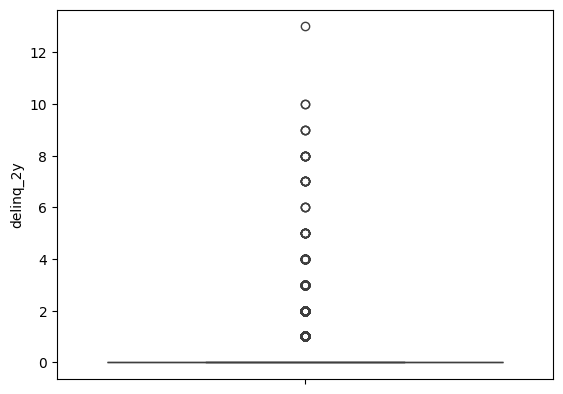

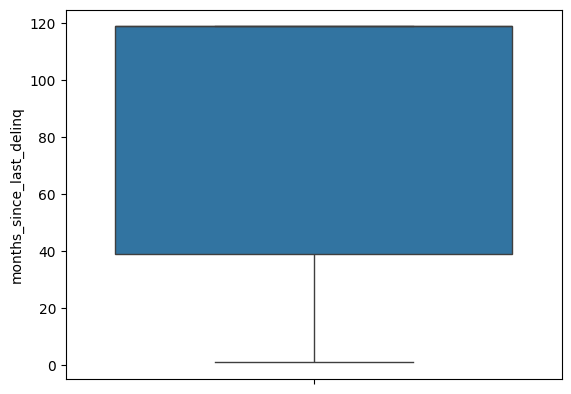

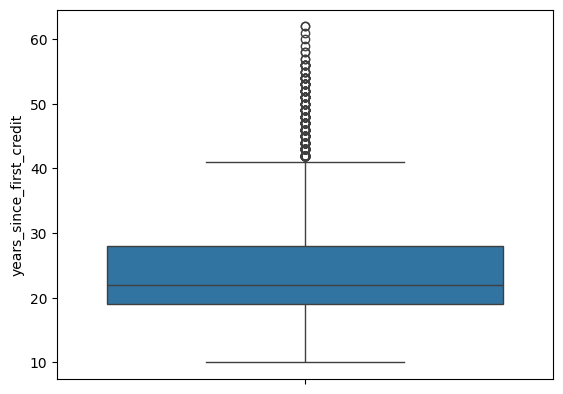

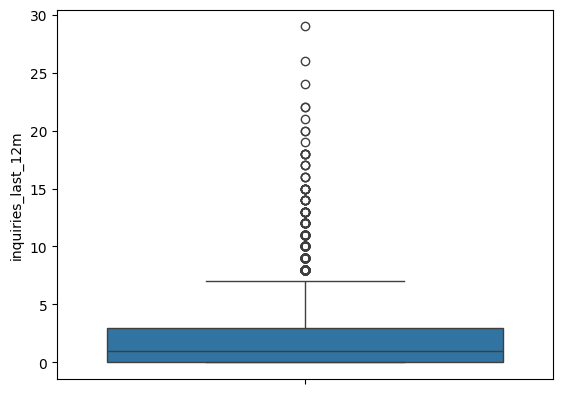

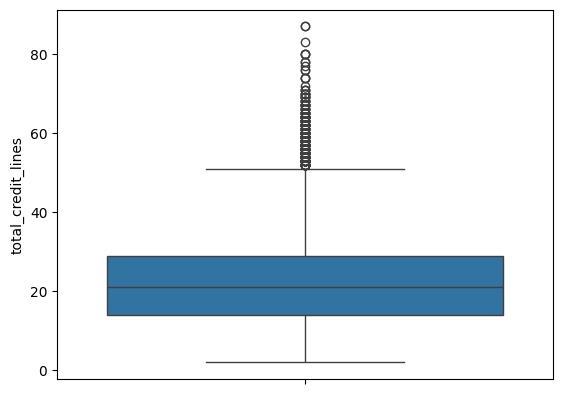

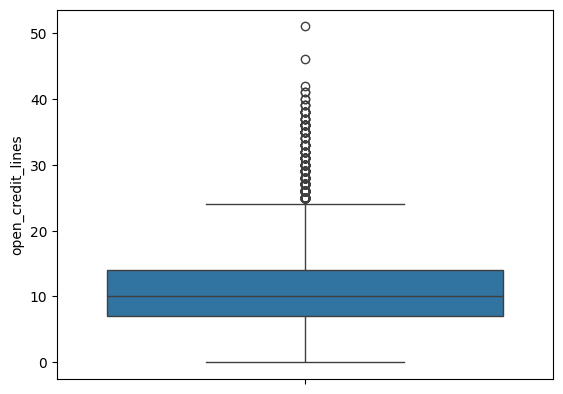

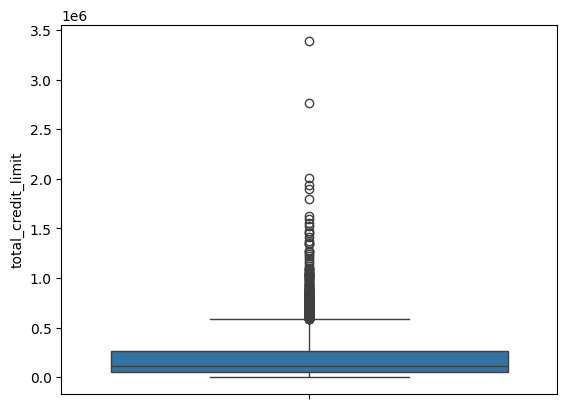

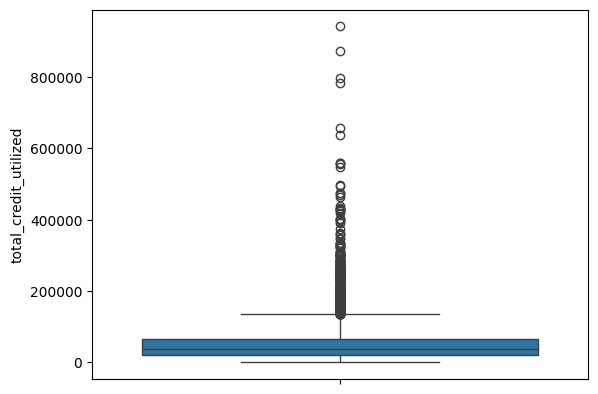

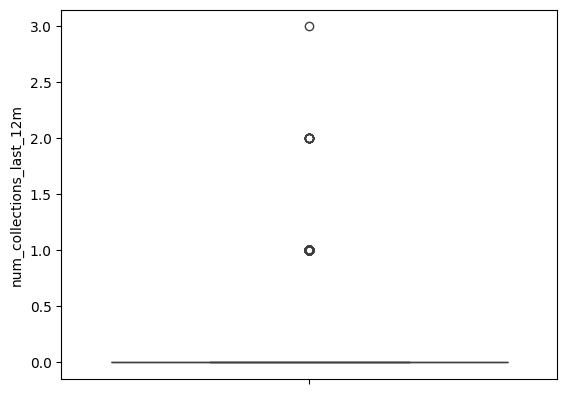

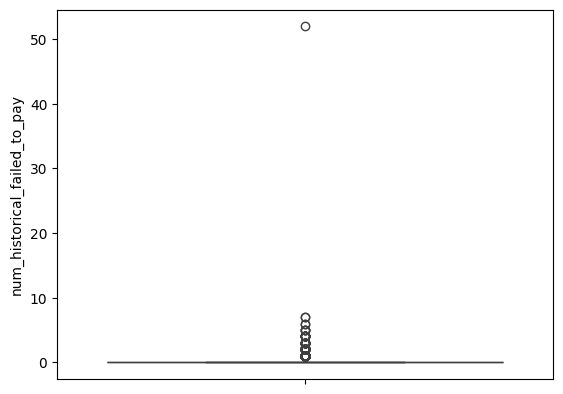

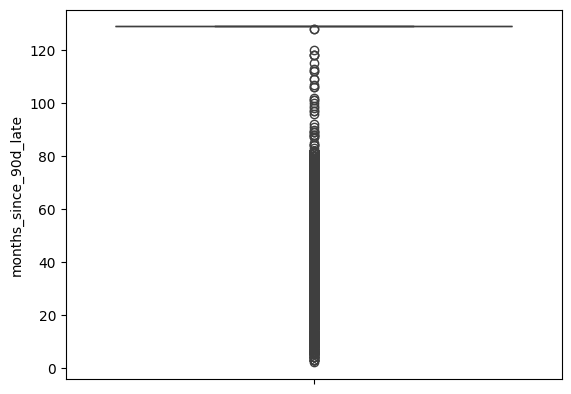

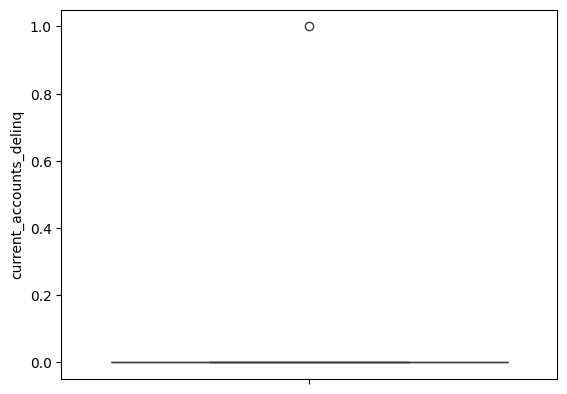

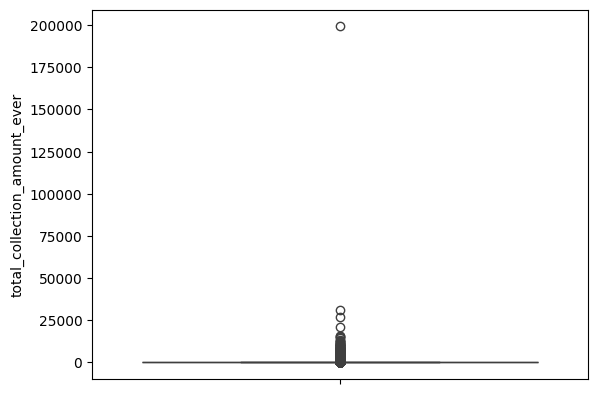

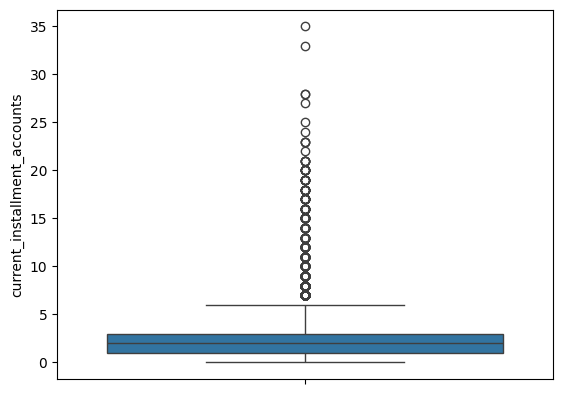

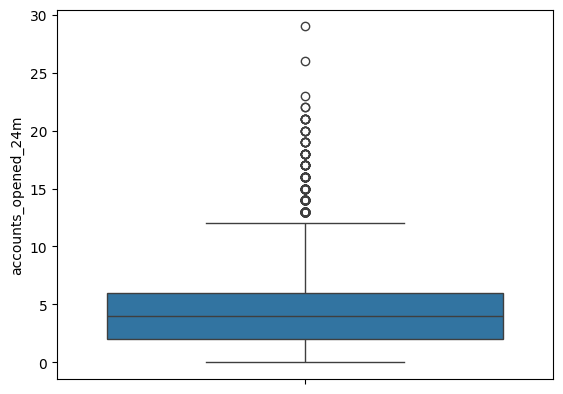

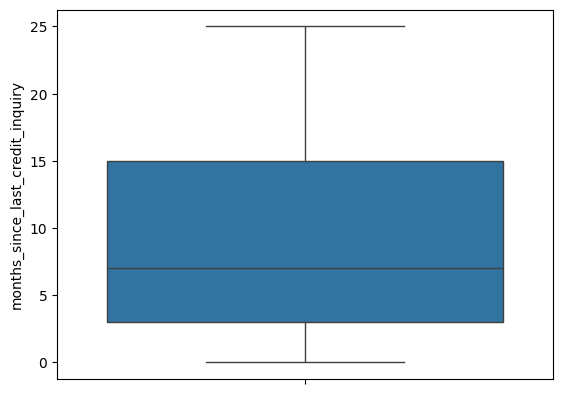

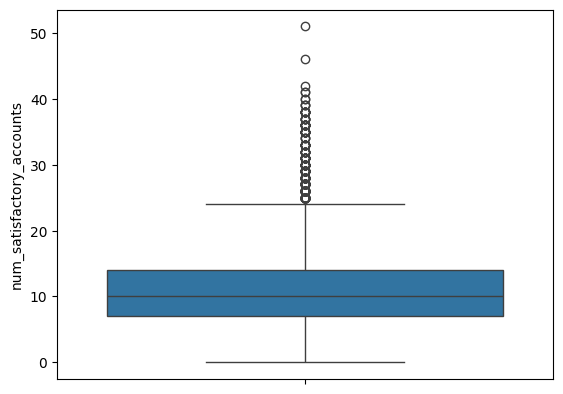

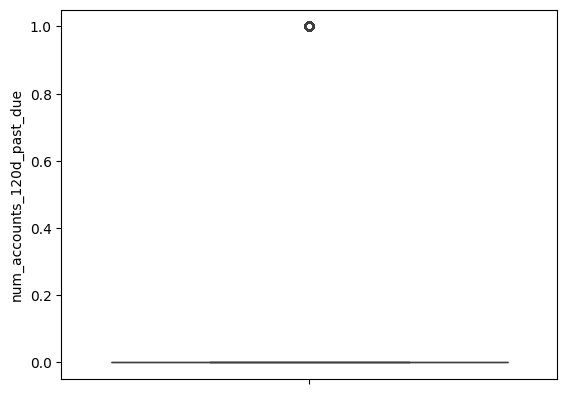

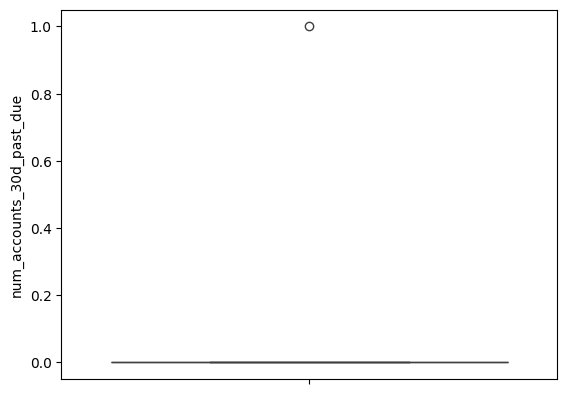

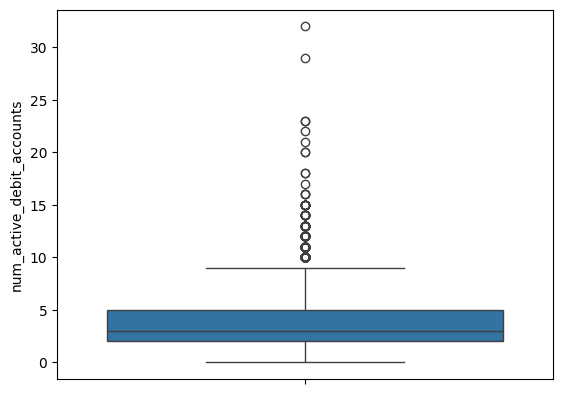

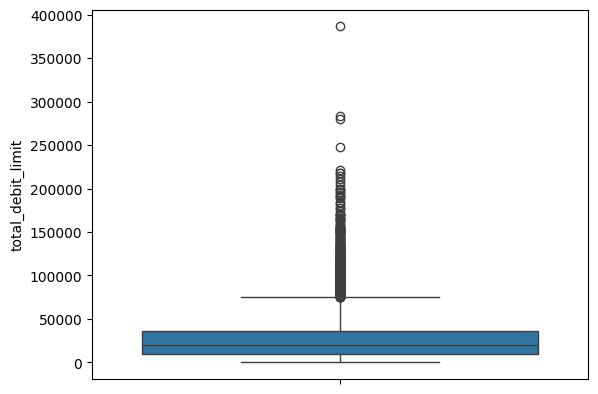

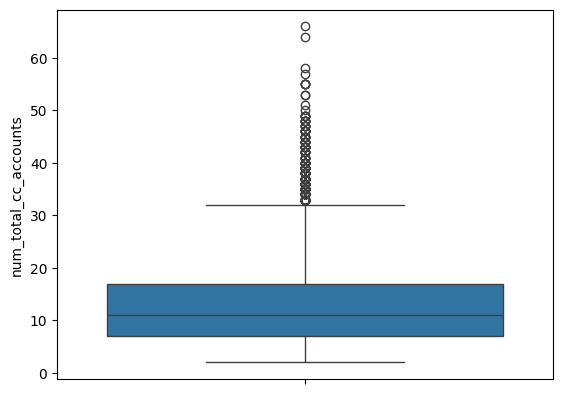

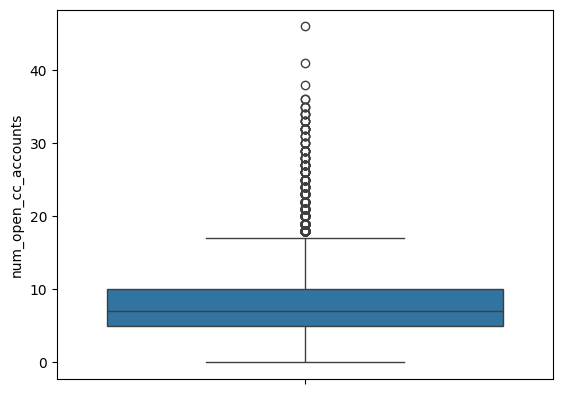

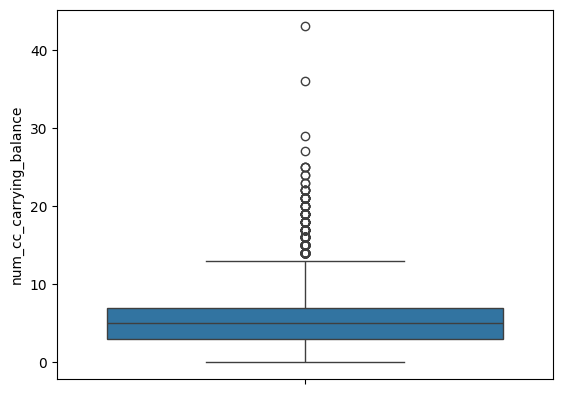

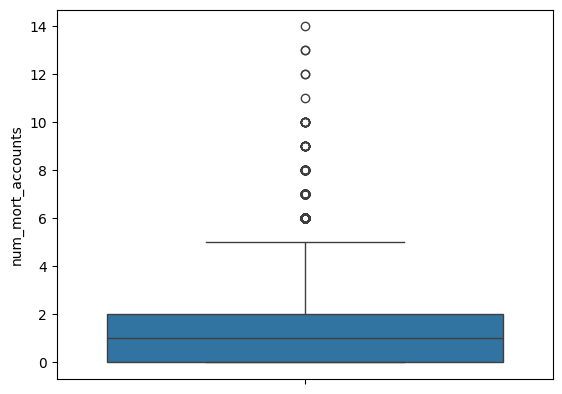

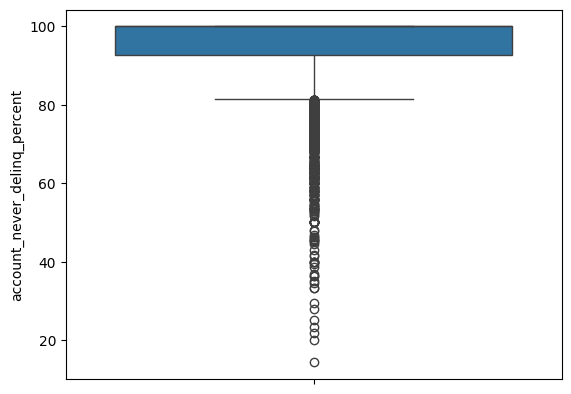

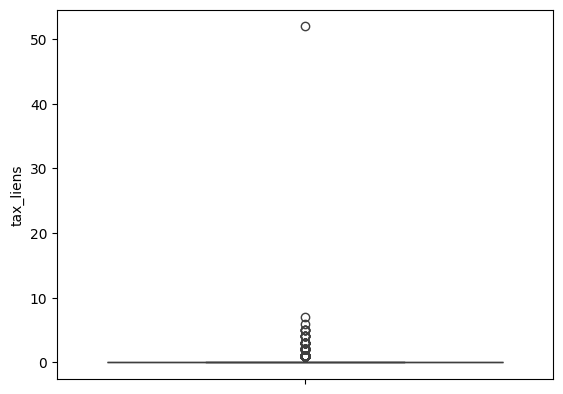

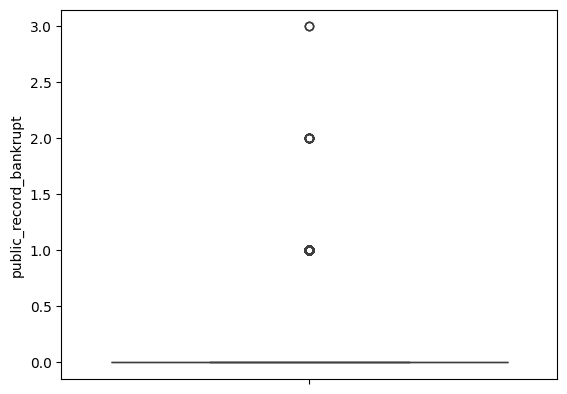

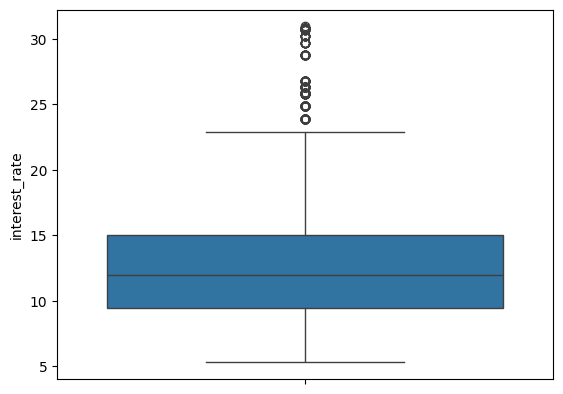

In [180]:
for col in temp_df.columns:
    sns.boxplot(data = temp_df[col])
    plt.show()